In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [3]:
df= pd.read_csv('/content/Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
df= df.iloc[:, 2:]
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [6]:
x= df.iloc[:, 0:2]
y= df.iloc[:,-1]

In [7]:
x.head()

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000


In [8]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Purchased, dtype: int64

In [9]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
x_scaled= scaler.fit_transform(x)

In [10]:
x_scaled.shape

(400, 2)

**DNN model**

In [11]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense
from keras import Sequential

In [12]:
model= Sequential()
model.add(Dense(10, activation='relu', input_dim=2))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                30        
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 151
Trainable params: 151
Non-trainable params: 0
_________________________________________________________________


In [13]:
# BGD
model.compile(loss='binary_crossentropy', metrics=['accuracy'])
start=time.time()
history= model.fit(x_scaled, y, validation_split=0.2, epochs=10, batch_size=400)
print(time.time()-start)

Epoch 1/10
1/1 [==============================] - 6s 6s/step - loss: 0.5953 - accuracy: 0.8219 - val_loss: 0.6147 - val_accuracy: 0.6625
Epoch 2/10
1/1 [==============================] - 0s 45ms/step - loss: 0.5883 - accuracy: 0.8250 - val_loss: 0.6123 - val_accuracy: 0.6625
Epoch 3/10
1/1 [==============================] - 0s 57ms/step - loss: 0.5832 - accuracy: 0.8250 - val_loss: 0.6104 - val_accuracy: 0.6625
Epoch 4/10
1/1 [==============================] - 0s 38ms/step - loss: 0.5790 - accuracy: 0.8250 - val_loss: 0.6086 - val_accuracy: 0.6750
Epoch 5/10
1/1 [==============================] - 0s 50ms/step - loss: 0.5752 - accuracy: 0.8281 - val_loss: 0.6069 - val_accuracy: 0.6875
Epoch 6/10
1/1 [==============================] - 0s 43ms/step - loss: 0.5718 - accuracy: 0.8344 - val_loss: 0.6053 - val_accuracy: 0.6875
Epoch 7/10
1/1 [==============================] - 0s 59ms/step - loss: 0.5686 - accuracy: 0.8344 - val_loss: 0.6038 - val_accuracy: 0.7000
Epoch 8/10
1/1 [=============

In [17]:
model1= Sequential()
model1.add(Dense(10, activation='relu', input_dim=2))
model1.add(Dense(10, activation='relu'))
model1.add(Dense(1, activation='sigmoid'))
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 10)                30        
                                                                 
 dense_4 (Dense)             (None, 10)                110       
                                                                 
 dense_5 (Dense)             (None, 1)                 11        
                                                                 
Total params: 151
Trainable params: 151
Non-trainable params: 0
_________________________________________________________________


In [19]:
# SGD
model1.compile(loss='binary_crossentropy', metrics=['accuracy'])
start=time.time()
history1= model1.fit(x_scaled, y, validation_split=0.2, epochs=10, batch_size=1)
print(time.time()-start)

Epoch 1/10
320/320 [==============================] - 2s 3ms/step - loss: 0.3703 - accuracy: 0.8094 - val_loss: 0.5696 - val_accuracy: 0.6875
Epoch 2/10
320/320 [==============================] - 1s 3ms/step - loss: 0.3381 - accuracy: 0.8219 - val_loss: 0.5476 - val_accuracy: 0.7000
Epoch 3/10
320/320 [==============================] - 1s 3ms/step - loss: 0.3235 - accuracy: 0.8188 - val_loss: 0.5263 - val_accuracy: 0.7000
Epoch 4/10
320/320 [==============================] - 1s 3ms/step - loss: 0.3189 - accuracy: 0.8313 - val_loss: 0.5038 - val_accuracy: 0.7000
Epoch 5/10
320/320 [==============================] - 1s 3ms/step - loss: 0.3116 - accuracy: 0.8500 - val_loss: 0.4879 - val_accuracy: 0.7000
Epoch 6/10
320/320 [==============================] - 1s 3ms/step - loss: 0.3029 - accuracy: 0.8406 - val_loss: 0.4633 - val_accuracy: 0.7250
Epoch 7/10
320/320 [==============================] - 1s 3ms/step - loss: 0.3027 - accuracy: 0.8500 - val_loss: 0.4383 - val_accuracy: 0.7250
Epoch 

Observation
1) BGD took less time
2) SGD gave better accuracy

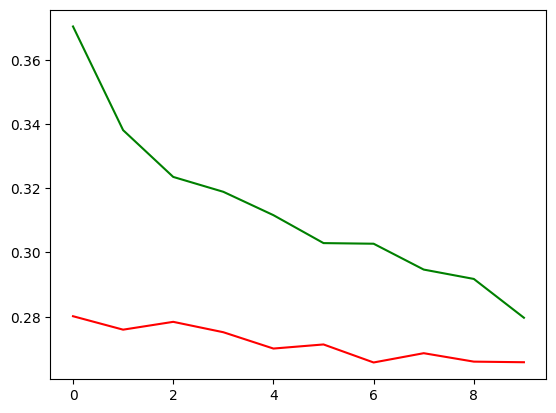

In [21]:
plt.plot(history.history['loss'], color= 'red')
plt.plot(history1.history['loss'], color= 'green')

In [22]:
# Mini BGD
model2= Sequential()
model2.add(Dense(10, activation='relu', input_dim=2))
model2.add(Dense(10, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))

model2.compile(loss='binary_crossentropy', metrics=['accuracy'])
start=time.time()
history2= model2.fit(x_scaled, y, validation_split=0.2, epochs=10, batch_size=32)
print(time.time()-start)

Epoch 1/10
10/10 [==============================] - 1s 21ms/step - loss: 0.7098 - accuracy: 0.2969 - val_loss: 0.6042 - val_accuracy: 0.7750
Epoch 2/10
10/10 [==============================] - 0s 8ms/step - loss: 0.6753 - accuracy: 0.4750 - val_loss: 0.6014 - val_accuracy: 0.8750
Epoch 3/10
10/10 [==============================] - 0s 6ms/step - loss: 0.6502 - accuracy: 0.8031 - val_loss: 0.5984 - val_accuracy: 0.9500
Epoch 4/10
10/10 [==============================] - 0s 5ms/step - loss: 0.6286 - accuracy: 0.8781 - val_loss: 0.5959 - val_accuracy: 0.9125
Epoch 5/10
10/10 [==============================] - 0s 5ms/step - loss: 0.6083 - accuracy: 0.8719 - val_loss: 0.5917 - val_accuracy: 0.8875
Epoch 6/10
10/10 [==============================] - 0s 5ms/step - loss: 0.5893 - accuracy: 0.8781 - val_loss: 0.5851 - val_accuracy: 0.8875
Epoch 7/10
10/10 [==============================] - 0s 7ms/step - loss: 0.5709 - accuracy: 0.8656 - val_loss: 0.5779 - val_accuracy: 0.8500
Epoch 8/10
10/10 [=

In [23]:
# Mini BGD + ADAM
model3= Sequential()
model3.add(Dense(10, activation='relu', input_dim=2))
model3.add(Dense(10, activation='relu'))
model3.add(Dense(1, activation='sigmoid'))

model3.compile(loss='binary_crossentropy', optimizer= 'adam', metrics=['accuracy'])
start=time.time()
history3= model3.fit(x_scaled, y, validation_split=0.2, epochs=10, batch_size=32)
print(time.time()-start)

Epoch 1/10
10/10 [==============================] - 2s 22ms/step - loss: 0.6916 - accuracy: 0.4000 - val_loss: 0.5942 - val_accuracy: 0.8000
Epoch 2/10
10/10 [==============================] - 0s 6ms/step - loss: 0.6650 - accuracy: 0.6469 - val_loss: 0.5816 - val_accuracy: 0.8000
Epoch 3/10
10/10 [==============================] - 0s 8ms/step - loss: 0.6422 - accuracy: 0.8313 - val_loss: 0.5697 - val_accuracy: 0.8125
Epoch 4/10
10/10 [==============================] - 0s 7ms/step - loss: 0.6213 - accuracy: 0.8562 - val_loss: 0.5613 - val_accuracy: 0.8375
Epoch 5/10
10/10 [==============================] - 0s 7ms/step - loss: 0.6023 - accuracy: 0.8500 - val_loss: 0.5528 - val_accuracy: 0.8625
Epoch 6/10
10/10 [==============================] - 0s 7ms/step - loss: 0.5846 - accuracy: 0.8500 - val_loss: 0.5470 - val_accuracy: 0.9000
Epoch 7/10
10/10 [==============================] - 0s 6ms/step - loss: 0.5678 - accuracy: 0.8562 - val_loss: 0.5420 - val_accuracy: 0.9000
Epoch 8/10
10/10 [=

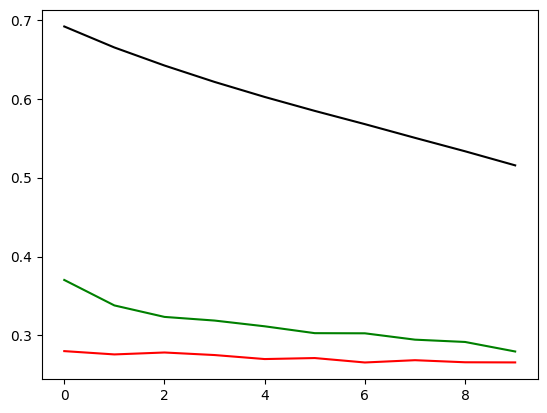

In [25]:
plt.plot(history3.history['loss'], color= 'black')
plt.plot(history.history['loss'], color= 'red')
plt.plot(history1.history['loss'], color= 'green')